# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Описание данных
* id — уникальный идентификатор скважины;
* f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
* product — объём запасов в скважине (тыс. баррелей).  
Условия задачи:  
* Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
* При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
* Бюджет на разработку скважин в регионе — 10 млрд рублей.
* При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
* После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.  
Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

## Загрузка и подготовка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [3]:
file_list = ['geo_data_0', 'geo_data_1', 'geo_data_2']
file_dict =  dict.fromkeys(file_list)
for i in file_dict:
    pth1 = i + '.csv'
    pth2 = '/datasets/' + i + '.csv'

    if os.path.exists(pth1):
        file_dict[i] = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        file_dict[i] = pd.read_csv(pth2)
    else:
        print('Something is wrong')


In [4]:
gd_0 = file_dict['geo_data_0']
gd_1 = file_dict['geo_data_1']
gd_2 = file_dict['geo_data_2']

In [5]:
gd_list = [gd_0, gd_1, gd_2]

Изучим общую информацию и статистику по каждой таблице. 

In [6]:
for gd in gd_list:
    print()
    display(gd.head())
for gd in gd_list:
    print()
    display(gd.info())
for gd in gd_list:
    print()
    display(gd.describe())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


f0


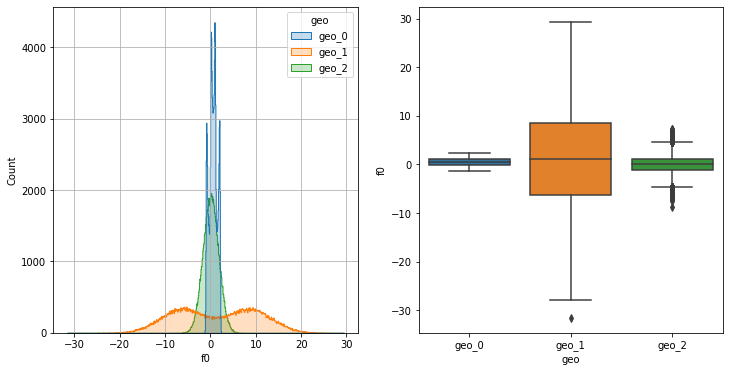

f1


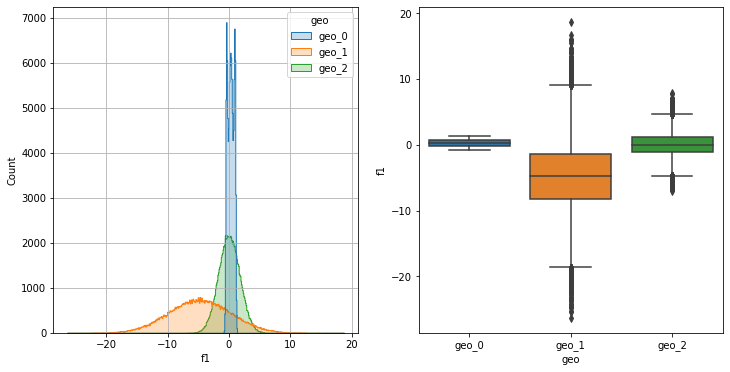

f2


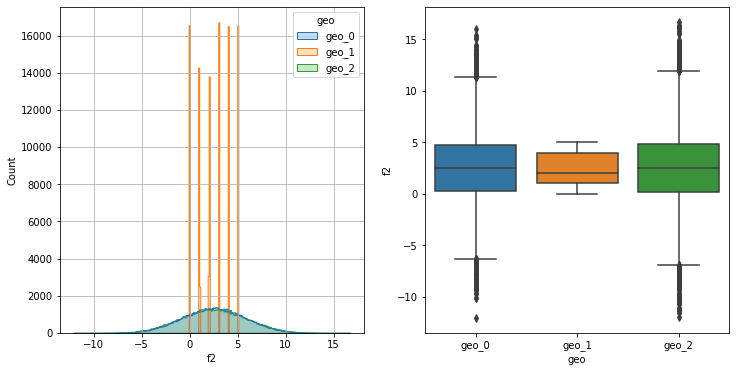

product


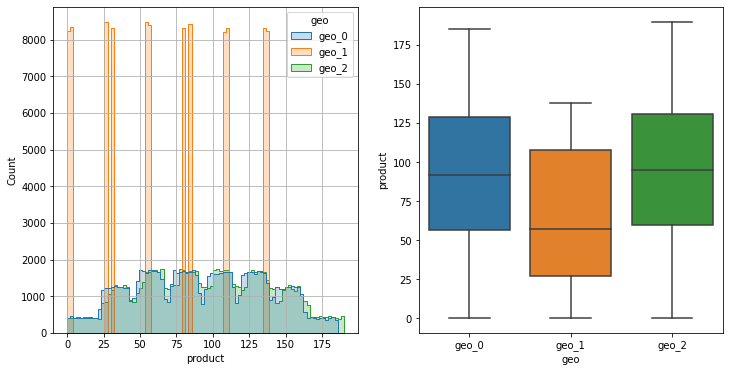

In [7]:
gd_0_copy = gd_0.copy()
gd_1_copy = gd_1.copy()
gd_2_copy = gd_2.copy()

gd_0_copy['geo'] = 'geo_0'
gd_1_copy['geo'] = 'geo_1'
gd_2_copy['geo'] = 'geo_2'
gd_total = pd.concat([gd_0_copy, gd_1_copy, gd_2_copy])

for col in gd_total.select_dtypes(include='number').columns:
    print(col)
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.histplot(data=gd_total, x=col, hue="geo", element='step')
    plt.grid()
    plt.subplot(1,2,2)
    sns.boxplot(data=gd_total, x='geo', y=col)
    plt.show()



Признак f0 по региону geo_0 изменяется от -1.4 до 2,4, по geo_2 от -8,8 до 7,2, регион geo_1 имеет наиболее широкий диапазон изменения данного параметра от -31,6 до 29,4 и бимодальный характер распределения. При этом средние значения по всем трем регионам достаточно близки и составляют от 0 до 1,1.  
Аналогино, по признаку f1 для региона geo_0 характерен наиболее узкий диапазон изменения от -0,8 до 0,7 со средним значением 0,25. Диапазон изменения по региону geo_2 несколько шире -7,1 до 7,8, среднее значение около 0. Для региона geo_1 характерен более широкий диапазон -26,4 до 18,7, среднее значение -4,8 ниже, чем по остальным регионам.  
По признаку f3 регионы geo_0 и geo_2 имеют схожие диапазоны изменения примерно от -12 до 16 и среднее в районе 2,5. Для региона geo_1 характерен узкий интервал разброса параметра от 0 до 4. Распределение имеет несколько узких пиков. 
Целевой признак - объем запасов в скважине для регионов geo_0 и geo_2 составляют 92,5 и 95 тыс. барр соответственно, для региона geo_1 - 68 тыс. барр. Также для региона geo_1 характерно неравномерное распределения запасов с несколькими типовыми значениями, схожим по количеству и форме с признкаом f2 для данного региона.  
Таким образом, регионы geo_0 и geo_2 достаточно схожи, регион geo_1 имеет существенные отличия от остальных регионов по всем рассмотренным признакам. 

In [8]:
gd_0.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [9]:
gd_1.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [10]:
gd_2.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


Для всех регионов наиболее коррелирующим признаком с целевым является признак f2. Для регионов geo_0 и geo_2 коэффициент корреляции объема запасов с данным признаком составляет 0,45-0,48, для региона geo_1 наблюдается практически идеальная корреляция на уровне 0,999.

Разобьем данные по каждому региону на две выборки: обучающую и валидационную в соотношении 75:25.

In [11]:
X0 = gd_0.drop(['product', 'id'], axis=1)
y0 = gd_0['product']
X0_train, X0_valid, y0_train, y0_valid = train_test_split(X0, y0, test_size=0.25, random_state=123)

In [12]:
X1 = gd_1.drop(['product', 'id'], axis=1)
y1 = gd_1['product']
X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1, y1, test_size=0.25, random_state=123)

In [13]:
X2 = gd_2.drop(['product', 'id'], axis=1)
y2 = gd_2['product']
X2_train, X2_valid, y2_train, y2_valid = train_test_split(X2, y2, test_size=0.25, random_state=123)

## Обучение и проверка модели

In [14]:
model0 = LinearRegression()
model1 = LinearRegression()
model2 = LinearRegression()

In [15]:
model0.fit(X0_train, y0_train)
model1.fit(X1_train, y1_train)
model2.fit(X2_train, y2_train)

LinearRegression()

In [16]:
pred0 = model0.predict(X0_valid)
pred1 = model1.predict(X1_valid)
pred2 = model2.predict(X2_valid)

In [17]:
print(f'Cредний запас предсказанного сырья для региона geo_0 - {round(pred0.mean(),1)} тыс. барр.')
print(f'Cредний запас предсказанного сырья для региона geo_1 - {round(pred1.mean(),1)} тыс. барр.')
print(f'Cредний запас предсказанного сырья для региона geo_2 - {round(pred2.mean(),1)} тыс. барр.')

Cредний запас предсказанного сырья для региона geo_0 - 92.5 тыс. барр.
Cредний запас предсказанного сырья для региона geo_1 - 69.3 тыс. барр.
Cредний запас предсказанного сырья для региона geo_2 - 95.1 тыс. барр.


In [18]:
rmse0 = mse(y0_valid, pred0) ** 0.5
rmse1 = mse(y1_valid, pred1) ** 0.5
rmse2 = mse(y2_valid, pred2) ** 0.5

In [19]:
print(f'RMSE модели для региона geo_0 - {round(rmse0,1)} тыс. барр.')
print(f'RMSE модели для региона geo_1 - {round(rmse1,1)} тыс. барр.')
print(f'RMSE модели для региона geo_2 - {round(rmse2,1)} тыс. барр.')

RMSE модели для региона geo_0 - 37.6 тыс. барр.
RMSE модели для региона geo_1 - 0.9 тыс. барр.
RMSE модели для региона geo_2 - 40.1 тыс. барр.


Среднеквадратичное значение ошибки модели линейной регрессии для региона geo_1 существенно меньше по сравнению с остальными регионами и равна 0,9 тыс.барр., что ожидаемо, учитывая очень сильную корреляцию по данному региону целевого признака с признаком f2.

Проверим адекватность модели, сопоставив RMSE с константными моделями, построенными на основе средних значений.

In [20]:
rmse0_const = mse(y0_valid, pd.Series(y0_train.mean(), index=y0_valid.index)) ** 0.5
rmse1_const = mse(y1_valid, pd.Series(y1_train.mean(), index=y1_valid.index)) ** 0.5
rmse2_const = mse(y2_valid, pd.Series(y2_train.mean(), index=y2_valid.index)) ** 0.5

print(f'RMSE константной модели для региона geo_0 - {round(rmse0_const,1)} тыс. барр.')
print(f'RMSE константной модели для региона geo_1 - {round(rmse1_const,1)} тыс. барр.')
print(f'RMSE константной модели для региона geo_2 - {round(rmse2_const,1)} тыс. барр.')

RMSE константной модели для региона geo_0 - 44.4 тыс. барр.
RMSE константной модели для региона geo_1 - 45.8 тыс. барр.
RMSE константной модели для региона geo_2 - 44.7 тыс. барр.


Таким образом RMSE моделей линейной регрессии ниже, чем у констаных моделей, что свидетельствует об их адекватности.

## Подготовка к расчёту прибыли

In [21]:
price = 450000 #цена за 1000 баррелей нефти в рублях
budget= 10 * 10**9 #бюджет на разработку скважин в регионе
count = 200 #количество скважин для разработки месторождения

In [22]:
min_product = budget / count / price
print(f'Достаточный объём сырья для безубыточной разработки новой скважины составляет {round(min_product, 1)} тыс. барр.')

Достаточный объём сырья для безубыточной разработки новой скважины составляет 111.1 тыс. барр.


Таким образом, по всем регионам средний запас предсказанного сырья ниже необходимого уровня для безубыточной разработки. Разработка любого из рассматриваемых регионов случайными 200 скважинами, выбранными из исходного набора данных окажется убыточным.

In [23]:
def profit(target, predictions, count):
    #Функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели
    best_pred = predictions.sort_values(ascending=False)[:count]
    best_target = target[best_pred.index]
    profit = price * best_target.sum() - budget
    return profit

## Расчёт прибыли и рисков 

In [24]:
def bootstrap_profit(target, predictions):
    '''
    Функция применяет технику Bootstrap с 1000 выборками, чтобы найти распределение прибыли 
    и на его основе рассчитать среднюю прибыль, 95%-й доверительный интервал и риск убытков.
    '''
    state = np.random.RandomState(123) 
    profit_list = []
    target = target.reset_index(drop=True)
    predictions = pd.Series(predictions)
    for i in range(1000):
        target_sub = target.sample(n=500, replace=True, random_state=state)
        pred_sub = predictions[target_sub.index]
        profit_list.append(profit(target_sub, pred_sub, count=count))
    profit_list = pd.Series(profit_list)
    mean_profit = profit_list.mean()
    lower = profit_list.quantile(0.025)
    upper = profit_list.quantile(0.975)
    risk_of_loss = profit_list[profit_list<0].count()/profit_list.shape[0]
    print(f'Cредняя прибыль: {round(mean_profit/1000000, 1)} млн. руб.')
    print(f'95% доверительный интервал: {round(lower/1000000, 1)} - {round(upper/1000000,1)} млн. руб')
    print(f'Риск убытков: {risk_of_loss:.1%}')

Найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков для каждого из регионов

In [25]:
#Регион geo_0
bootstrap_profit(y0_valid, pred0)

Cредняя прибыль: 695.3 млн. руб.
95% доверительный интервал: 102.5 - 1355.0 млн. руб
Риск убытков: 1.1%


In [26]:
#Регион geo_1
bootstrap_profit(y1_valid, pred1)

Cредняя прибыль: 685.9 млн. руб.
95% доверительный интервал: 163.7 - 1241.8 млн. руб
Риск убытков: 0.1%


In [27]:
#Регион geo_2
bootstrap_profit(y2_valid, pred2)

Cредняя прибыль: 539.6 млн. руб.
95% доверительный интервал: -74.6 - 1195.0 млн. руб
Риск убытков: 4.0%


Вероятность убытков меньше 2.5% по региону geo_0 и geo_1. Из них максимальная прибыль ожидается по региону geo_0. Данный регион может быть рекомендован для разработки скважин. В то же время необходимо иметь ввиду, что качество модели на основе метрики rmse для региона geo_0 существенно ниже, чем для geo_1. Это требует дальнейших попыток по улучшению предсказательных возможностей модели geo_0.

## Выводы  
На основе данных анализа нефти по трем регионам построены модели Линейной Регрессии, которые для каждого региона по трем известным признакам предсказывают объем запасов, приходящийся на скважину. Качество модели оценено по метрике rmse, которое для модели по региону geo_1 (0.9 тыс. барр) оказалось существенно выше, чем по geo_0 (37,6) и geo_2 (40,1).  
Рассчитан средний запас нефти на скважину для безубыточной разработки месторождения (111,1 тыс. барр). Средние запасы нефти по регионам по исходным выборкам ниже границы безубыточности. Данный факт требует тщательного выбора наиболее перспективных по запасам скважин для последующего ввода в разработку.  
Написана функция для расчета прибыли на основе предсказанных и фактических запасов. На основе данной функции и техники Bootstrap с использованием 1000 случайных выборок из валидационной части данных, для каждого региона определено распределение прибыли, рассчитаны средняя прибыль, 95% доверительный интервал и риск возможных убытков. На основе проведенных расчетов рекомендован регион для разработки (geo_0), характеризующийся максимальной средней прибылью 685,9 млн. руб и риском убытков 1,1%.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован